# Random Forest - Model Training

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [45]:
dataset = pd.read_csv('combined_metrics.csv')

## Visualize Dataset

In [46]:
dataset.head()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
0,0.025967,0.149649,2.284523,-10.269194,17,0.019115,0.236742,5.585155,-1.251265,20,0.268438,0.139471,9.131639,-18.530758,27,1
1,0.024132,0.149547,2.272307,-10.310649,16,0.020332,0.237447,5.623074,-1.204877,20,0.269707,0.139023,9.187616,-18.425003,26,1
2,0.021001,0.150147,2.275984,-9.992131,16,0.021384,0.237961,5.651662,-1.171929,20,0.270788,0.138690,9.236838,-18.255960,27,1
3,0.019992,0.149930,2.265391,-10.067565,16,0.025724,0.243507,5.936428,-0.909256,20,0.274968,0.141341,9.538472,-17.979045,27,1
4,0.019370,0.149982,2.264473,-10.036759,17,0.029207,0.246331,6.092519,-0.772432,21,0.278490,0.140402,9.707206,-18.063853,27,1


In [47]:
print(dataset.isnull().sum())

Mean_X           0
Std Dev_X        5
Energy_X         0
Entropy_X        0
Peaks_X          0
Mean_Y           0
Std Dev_Y        5
Energy_Y         0
Entropy_Y        0
Peaks_Y          0
Mean_Mixed       0
Std Dev_Mixed    5
Energy_Mixed     0
Entropy_Mixed    0
Peaks_Mixed      0
category         0
dtype: int64


## Seperate X-Y values, Train-Test values

In [48]:
X = dataset.drop(columns=['category'])
Y = dataset['category']

## Train the Model - Basics

### Train the Model

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

### Predict test set from the model and check accuracy

In [50]:
predict = model.predict(X_test)

In [51]:
accuracy_score(Y_test, predict)

0.6560364464692483

In [52]:
confusion_matrix(Y_test, predict)

array([[283,   0,   0,   1,   0],
       [  0,  37, 249,   0,   0],
       [  0, 199,  43,   0,   0],
       [  0,   0,   0, 263,   1],
       [  1,   0,   1,   1, 238]], dtype=int64)

In [53]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       284
           2       0.16      0.13      0.14       286
           3       0.15      0.18      0.16       242
           4       0.99      1.00      0.99       264
           5       1.00      0.99      0.99       241

    accuracy                           0.66      1317
   macro avg       0.66      0.66      0.66      1317
weighted avg       0.66      0.66      0.66      1317



### Cross validation 

In [61]:
scores = cross_val_score(model, X, Y, cv=5) # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.64236902 0.6594533  0.61845103 0.64880274 0.62713797]
Mean cross-validation score: 0.6392428110949785


## Train the Model - Finding the BEST Case

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

### Find: Test set and Training set split value

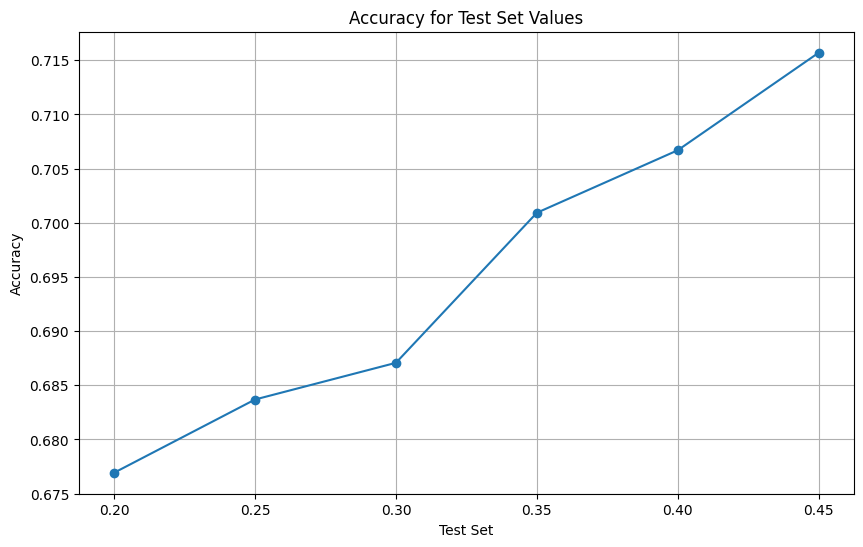

In [56]:
test_size_range = np.arange(0.2, 0.5, 0.05)
test_size_scores = []

for test_size in test_size_range:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    modelRF = RandomForestClassifier(n_estimators=5, random_state=42) # 5 decision trees
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    test_size_scores.append(scores.mean()) # Mean accuracy score

plt.figure(figsize=(10, 6))
plt.plot(test_size_range, test_size_scores, marker='o')
plt.title('Accuracy for Test Set Values')
plt.xlabel('Test Set')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

### Find: No.of Decision Trees

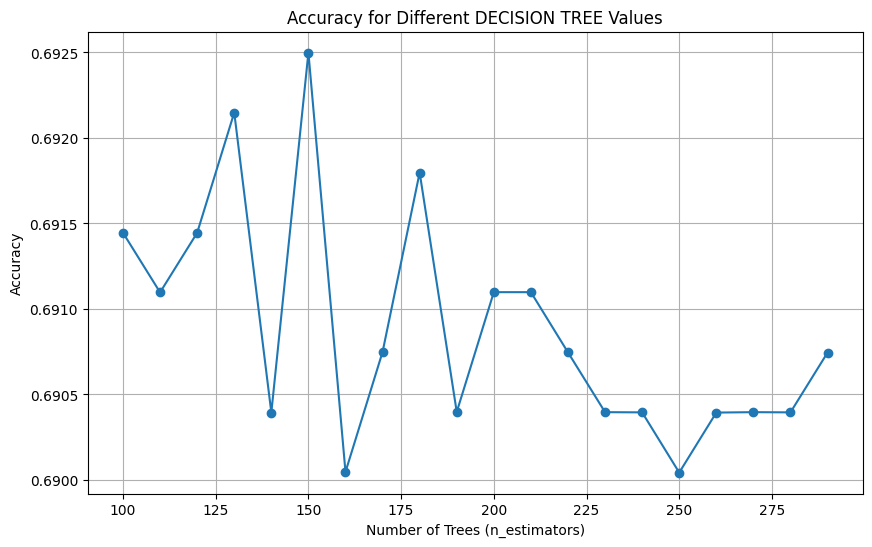

The optimal number of trees is 150 with cross-validation accuracy of 0.6925


In [58]:
n_estimators_range = range(100, 300, 10)  # n_estimators: DECISION TREES
accuracy_scores = []

for n_estimator in n_estimators_range:
    modelRF = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    scores = cross_val_score(modelRF, X_train, Y_train, cv=10)  # 10-fold cross validation
    accuracy_scores.append(scores.mean()) # Mean cross-validation score

# Plot the cross-validation accuracy against n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title('Accuracy for Different DECISION TREE Values')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal n_estimators value
optimal_n_estimators = n_estimators_range[np.argmax(accuracy_scores)]
print(f"The optimal number of trees is {optimal_n_estimators} with cross-validation accuracy of {max(accuracy_scores):.4f}")

### Find: No.of Cross Validation

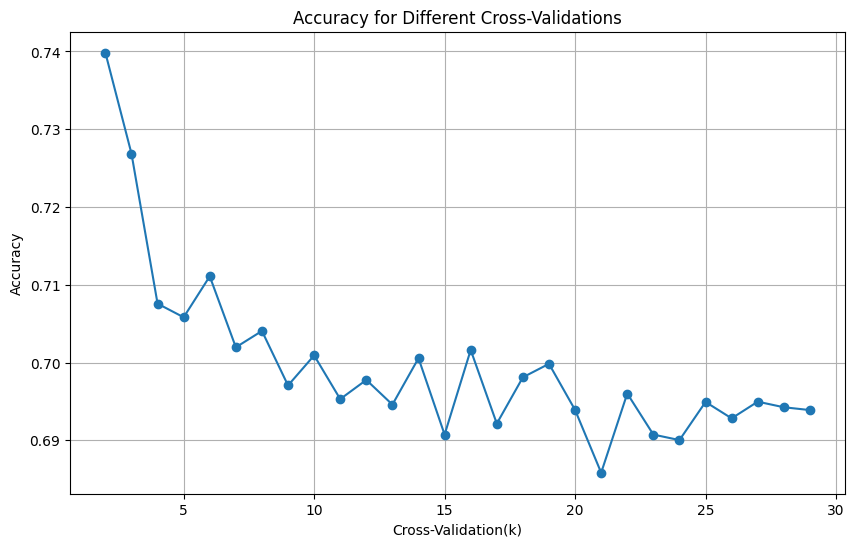

The optimal number of trees is 100 with cross-validation accuracy of 0.7398


In [65]:
cross_validation_range = range(2, 30, 1)  
accuracy_on_cross_validation = []

for kVal in cross_validation_range:
    modelRF = RandomForestClassifier(n_estimators=5, random_state=42) # 5 decision trees
    scores = cross_val_score(modelRF, X_train, Y_train, cv=kVal)  
    accuracy_on_cross_validation.append(scores.mean()) # Mean score
       
plt.figure(figsize=(10, 6))
plt.plot(cross_validation_range, accuracy_on_cross_validation, marker='o')
plt.title('Accuracy for Different Cross-Validations')
plt.xlabel('Cross-Validation(k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal n_estimators value
optimal_n_estimators = n_estimators_range[np.argmax(accuracy_on_cross_validation)]
print(f"The optimal number of trees is {optimal_n_estimators} with cross-validation accuracy of {max(accuracy_on_cross_validation):.4f}")

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)
model = RandomForestClassifier(n_estimators=150, random_state=42)
scoreFinal = cross_val_score(modelRF, X_train, Y_train, cv=2)  

print("Cross-validation scores:", scoreFinal)
print("Mean cross-validation score:", scoreFinal.mean())

Cross-validation scores: [0.73702665 0.74263675]
Mean cross-validation score: 0.7398316970546985
